# Regularization in Linear models

## Reading:

1. GoodFellow. Deep Learning. p 245-252, 261-268
2. Bishop. Pattern Recognition and Machine Learning p 140-146

## Outline

1. General Form, Polynomial Regression
1. Analytic Solution
1. SGD
1. L2 regularization in linear models
1. L2 regularization as stabilization of matrix inverse
1. L2 regularization as gaussian prior on weights
1. Equivance between L2 and early stopping
1. L1 regularization and sparsity
1. ElasticNet
1. Pytorch and computational graphs

# 1. Polynomial Regression

Here we explore linear regression with MSE loss

$$ L_{MSE}(y, \hat y) = \frac 1 N \sum_{i=1}^N (y - \hat y)^2$$

Usually we write 

$$ \hat y = w^T x + b$$
where $w, b$ - model weights, and $b$ is called *intercept*

For future convinience add $b$ into vector $x$  
$$(x)^T \rightarrow (1, x)^T $$
$$ \hat y = w^T x$$

<img src="images/poly.jpg" style="height:300px">

What if we can't approximate data with linear model?
Use polynomial regression

$$ \phi_n(x) = (1, x, x^2, x^3, .., x^n)^T $$
And this way can still use linear model
$$ \hat y = w^T \phi_n(x)$$

However, need to choose the right polynomial power

<img src="images/poly2.png" style="height:300px">

# 2. Analytic solution of linear regression

$$ y = w^T X$$

Let's find global minimum

$$ L_{MSE}(y, X) = \frac 1 N (y - Xw)^T (y - Xw) = \\
\frac 1 N (y^T - (Xw)^T) (y - Xw) = \\
\frac 1 N ( y^T y - y^T (Xw) - (Xw)^T y + (Xw)^T (Xw) ) = \\
\frac 1 N ( y^T y - 2 y^T (Xw) + (Xw)^T (Xw) )
$$

1. $ \frac {\partial (BA)} {\partial A} = B^T$
1. $ \frac {\partial (A^T B)} {\partial A} = B$
1. $ \frac {\partial (A^T A)} {\partial A} = 2 A$
1. $ \frac {\partial (A^T B A)} {\partial A} = AB + A^T B$

$$ \frac {\partial L_{MSE}} {\partial w} = \frac 1 N ( - 2 X^T y + 2 X^T X w ) = 0  $$

$$ X^T X w = X^T y $$

$$ w = (X^T X)^{-1} X^T y $$

Properties of analytic solution depends on $(X^T X)^{-1}$
Remember, that if $det(A) \rightarrow 0$ then $A^{-1}$ is numerically unstable

# 3 Iterative Solution by GD

As we observed previously

$$ \nabla_{w} L_{MSE} = \frac 1 N X^T (X w - y) $$

1. $w^{(0)}$ = random init
2. at time $t$  $w^{(t)} = w^{(t-1)} - \alpha \nabla_{w} L_{MSE}(w^{(t-1)}) $
3. until convergence $ || \nabla_{w} L_{MSE}(w^{(t-1)}) ||  < \epsilon $ OR $ || w^{(t)} - w^{(t-1)} ||  < \epsilon $  OR number of iterations exceeds predefined maximum


* No issues of $(X^T X)^{-1}$ numeric stability!

<img src="images/gd.png" style="height:300px">

# 4 $L_2$ regularization in linear models

General Form
$$L_{reg}(y, X, w) = L(y, X) + \lambda R(w)$$

where $R(w)$ - regularization term
$\lambda$ - coef of regularization (regularization strength)

In linear modes we usually use $L_p$  norm regularization:

$$ R(w) = || w  ||_p^p $$

For MSE with $L_2$ regularization

$$L_{MSE} = \frac 1 N || y - Xw ||_2^2 + \frac {\lambda} {2} ||w||_2^2$$

$$ \nabla_{w} L_{MSE} = \frac 1 N X^T (X w - y)  + \lambda w $$


# 5 $L_2$ regularization as stabilization of matrix inverse

From analytic solution we have

$$ \nabla_{w} L_{MSE} = \frac 1 N X^T (X w - y) + \lambda w = 0  $$

Up to scaling factor $\lambda$

$$ \nabla_{w} L_{MSE} = X^T (X w - y) + \lambda w = 0  $$

$$ (X^T X  + \lambda I) w = X^T y $$
$$ w = (X^T X + \lambda I)^{-1} X^T y $$

Thus we have stabilization of matrix inverse
$$(X^T X)^{-1} \rightarrow (X^T X + \lambda I)^{-1} $$Also called Tihonov regularization. 

# 6 $L_2$ regularization as gaussian prior on weights

Bayessian view

We have samples $\{ (x_i, y_i) \}_{i=1}^N$ from some distribution $P(x,y)$

Suppose 
$$ y_i = w^T x_i + \epsilon$$, where
$$ \epsilon \sim N(0, \sigma^2) $$

Thus we can construct likelihood function (remember MLE)
$$ P(y_1,..,y_N | x_1, .., x_N) = \prod_{i=1}^N N(y_i| w^T x_i, \sigma^2)$$


where $N(y_i| w^T x_i, \sigma^2)$ is a gaussian distribution with mean $w^T x_i$ and variance $\sigma^2$

$ N(y_i| w^T x_i, \sigma^2) = \frac 1 {\sqrt {2 \pi \sigma}} e^{- \frac {(y_i - w^T x_i)^2} {2 \sigma^2}}$


And by imposing gaussian prior on weights $w \sim N(0, \lambda^{-1})$

$$ P(y_1,..,y_N | x_1, .., x_N) = \prod_{i=1}^N N(y_i| w^T x_i, \sigma^2) N(w | 0, \lambda^{-1})$$

by MLE we would like to maximize

$$ \log \prod_{i=1}^N N(y_i| w^T x_i, \sigma^2) N(w | 0, \lambda^{-1}) \rightarrow \max_{w} $$

$$ \sum_{i=1}^N \log N(y_i| w^T x_i, \sigma^2) + N * \log N(w | 0, \lambda^{-1}) \rightarrow \max_{w} $$

$$ -\sum_{i=1}^N \log N(y_i| w^T x_i, \sigma^2) - N * \log N(w | 0, \lambda^{-1}) \rightarrow \min_{w} $$

$$ -\sum_{i=1}^N (- \frac 1 {2 \sigma^2} (y_i - w^T x_i)^2) - N * (- \frac 1 {2 \lambda^{-1}}  w^T w) \rightarrow \min_{w} $$

$$ \frac 1 {N \sigma^2} \sum_{i=1}^N  (y_i - w^T x_i)^2 + \frac \lambda 2 w^T w \rightarrow \min_{w} $$

Up to scaling factor $\sigma^2$ we have familiar MSE loss with L2 regularization

$$ \frac 1 {N \sigma^2} (y - Xw)^T(y-Xw) + \frac \lambda 2 ||w||_2^2 \rightarrow \min_{w} $$


<img src="images/l2.png" style="height:300px">

# 7 $L_2$ regularization and early stopping

In Iterative solution we have mentioned some stopping criteria.
We can imagine another one called *early stopping*:
1. split data into train and validation subsets
1. update model weights $w$ on train dataset
1. keep track of the loss value on validation dataset
1. if on several consecutive iterations values of the loss function on validation dataset grows, than overfitting is observed $\rightarrow$ stop training

It can be shown, that number of consecutive iterations before early stopping $\tau$ can be expressed by coefficient of $L_2$ regularization $\lambda$

$$\tau \sim \frac 1 {\lambda}$$

<img src="images/stop.png" style="height:300px">

# 8 $L_1$ regularization and sparsity

What if we use other norm for regularization?

$$ R(w) = || w  ||_1 $$

For MSE with $L_1$ regularization

$$L_{MSE} = \frac 1 N || y - Xw ||_2^2 + \frac {\lambda} {2} ||w||_1$$

$$ \nabla_{w} L_{MSE} = \frac 1 N X^T (X w - y)  + \lambda sign(w) $$

* $L_1$ norm is not differentiable at $w = 0$, but can be lower bounded by surrogate gradients (just say $\nabla_{w} R(0) \in  [-1,1]$)
* Gives sparse solutions: some of $w$ components are 0 

* Bayesian view on $L_1$ norm regularizer is a Laplacian prior on weights $$ P(x | \mu, b ) = \frac 1 {2b} e^{- \frac {| x - \mu|} {b}}$$

<img src="images/l1.png" style="height:300px">

* $L_1$ can be used for feature selection


* ! Remember, any $L_p$ norm regularization shifts optimal solution $w_{*}$ 
    For linear models, if we want to make predictions with feature selection
    1. First, train linear model with $L_1$ regularizer and select features with $|w_i| > 0$
    2. Second, on selected subset of features, train linear model $L_2$ and use it for final prediction
    
* ! Remember about situation with correlated features

# 9 Elastic Net Regularization

$$ L_{reg}(y, \hat y, w) = L(y, \hat y) + \lambda_1 ||w||_1 + \lambda_2 ||w||_2^2$$

Usually we would like to have convex combination in the form

$$ L_{reg}(y, \hat y, w) = L(y, \hat y) + \lambda_1 ||w||_1 + (1 - \lambda_1) ||w||_2^2$$


<img src="images/reg.png" style="height:300px">

# 10 Pytorch and Computational Graphs
<img src="images/graph.jpg" style="height:300px">

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale

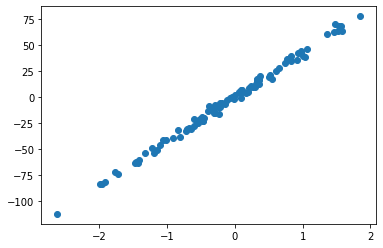

In [5]:
# create dataset
X, Y = make_regression(100, n_features=1, n_informative=1, noise=3, random_state=42)
plt.scatter(X, Y)

In [7]:
# convert numpy array to pytorch tensor.
# dtype dose matter!

X = torch.tensor(X).float()
Y = torch.tensor(Y).view(-1,1).float()

In [13]:
# all neural nets should be descendant of nn.Module 

class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim):

        super(LinearRegressionModel, self).__init__() 
        
        # weight initialization
        w_init = np.random.randn(input_dim, 1)
        b_init = np.random.randn(1)
        
        # trainable parameters
        self.W = nn.Parameter(torch.tensor(w_init).float())
        self.b = nn.Parameter(torch.tensor(b_init).float())

    # forward pass
    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = torch.mm(X, self.W) + self.b
        return out

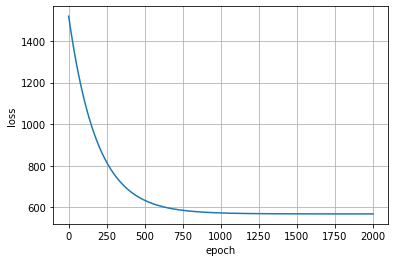

In [19]:
# feature dimension
input_dim = X.shape[1]
model = LinearRegressionModel(input_dim)

# train routine
def train(model, X, Y, learning_rate, epochs, alpha=1):
    """
    X - feature matrix, tensor
    Y - target values, tensor
    learning_rate - step size for SGD
    epochs - number of full passes over dataset
    alphha - regularization parameter
    """
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    
    # training history
    history = []
    for epoch in range(epochs):

        epoch +=1

        # gradients should be cleared before  every iteration
        optimizer.zero_grad()
        
        #forward to get predicted values
        outputs = model.forward(X)
        
        # loss
#         loss = criterion(outputs, Y)
        
        # L2 regularization
        loss = criterion(outputs, Y)+ alpha/2 * torch.norm(model.W)**2
        
        # backward  propagation
        loss.backward()# back props
        
        # step in the direction of the antigradient and update parameters
        optimizer.step()
        
        # logging
        history.append((epoch,loss.data.item()))
        
    return history


history = train(model, X, Y, 0.001, epochs=2000, alpha=1)
xx = list(map(lambda x: x[0], history))
yy = list(map(lambda x: x[1], history))
plt.plot(xx, yy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

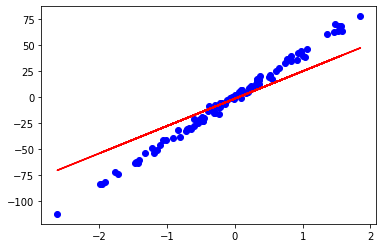

In [20]:
# plot result

ww = model.W[0,0].detach().numpy()
bb = model.b[0].detach().numpy()
ww, bb

xx = X.numpy()
yy = Y.numpy()
plt.scatter(xx, yy, color='b')
plt.plot(xx, ww*xx + bb, color='r')